# **Momentum Techhnical Indicators**
---

#### Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Technical Analysis Library 
import ta
import datetime

from pandas_datareader import data as web
from ta.utils import dropna

#### Import Data

In [2]:
stock = 'MSFT'
days_back = 252

start_date = (datetime.datetime.now() - datetime.timedelta(days=days_back)).strftime("%m-%d-%Y")
df = web.DataReader(stock, data_source = 'yahoo', start=start_date)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2021-08-17 to 2022-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       175 non-null    float64
 1   Low        175 non-null    float64
 2   Open       175 non-null    float64
 3   Close      175 non-null    float64
 4   Volume     175 non-null    float64
 5   Adj Close  175 non-null    float64
dtypes: float64(6)
memory usage: 9.6 KB


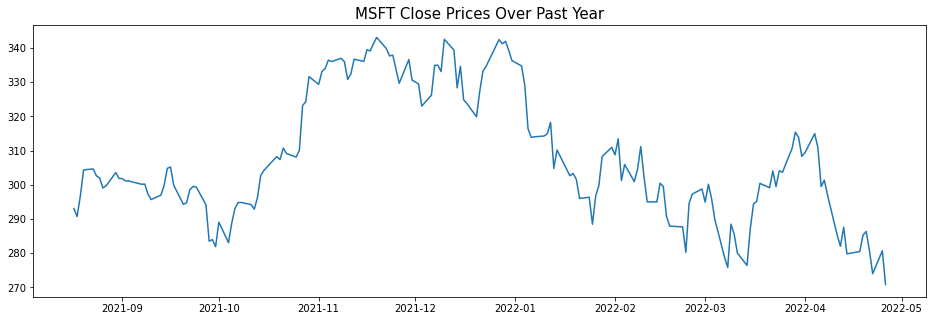

In [18]:
plt.figure(figsize=(16,5))
plt.plot(df['Close'])

plt.title('{} Close Prices Over Past Year'.format(stock),fontsize=15)
plt.show()

### Relative Strength Index (RSI)
---
- not a trend indicator -> momentum indicator 
- measures rise and fall of the stock price 

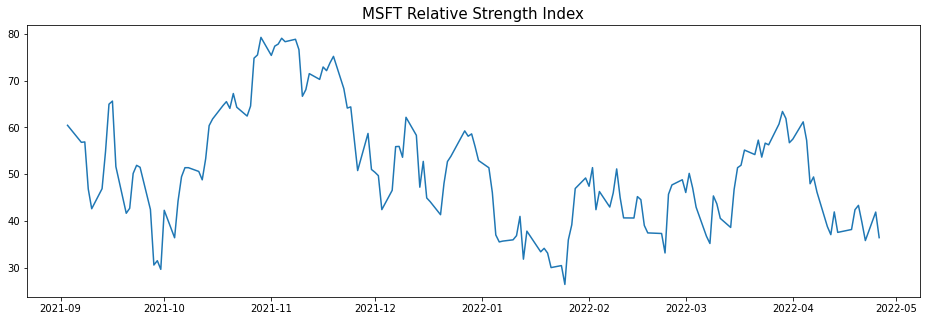

In [11]:
rsi = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

plt.figure(figsize=(16,5))
plt.plot(rsi)

plt.title('{} Relative Strength Index'.format(stock),fontsize=15)
plt.show()

### True Strength Indicator (TSI)
---
- shows both trend direction and overbought/oversold conditions 

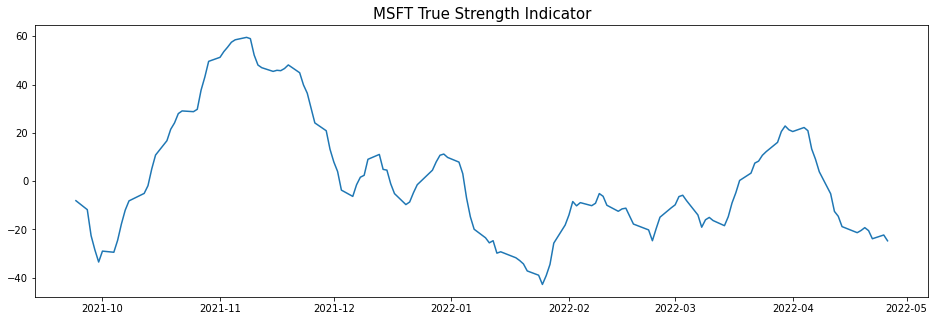

In [12]:
tsi = ta.momentum.TSIIndicator(df['Close'],window_slow=7, window_fast=21).tsi()

plt.figure(figsize=(16,5))
plt.plot(tsi)

plt.title('{} True Strength Indicator'.format(stock),fontsize=15)
plt.show()

### Ultimate Oscillator
---
- Larry Williams (1976): a momentum oscillator designed to capture momentum across three different timeframes 
    

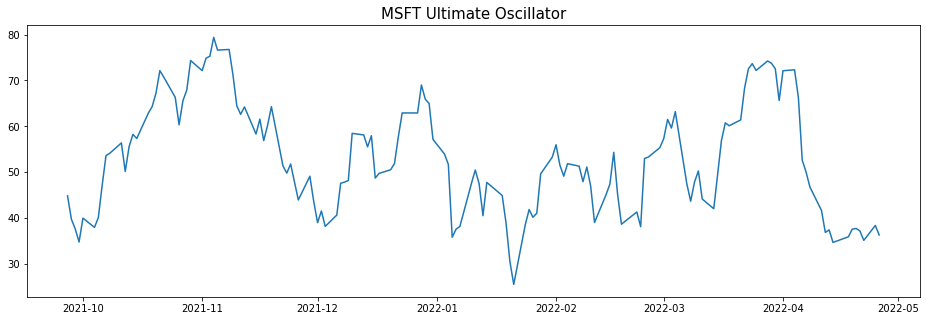

In [17]:
ultimate = ta.momentum.UltimateOscillator(df['High'],df['Low'],df['Close']).ultimate_oscillator()

plt.figure(figsize=(16,5))
plt.plot(ultimate)

plt.title('{} Ultimate Oscillator'.format(stock),fontsize=15)
plt.show()

### Stochastic Oscillator
---
- George Land in 1950s: presents location of the closing price of a stock in relation to the high and low range of the price of a stock over a period of time
    - typically 14-day period 
    

In [31]:
stoch = ta.momentum.StochasticOscillator(df['High'],df['Low'],df['Close'],window=14,smooth_window=3).stoch()
stock_sig = ta.momentum.StochasticOscillator(df['High'],df['Low'],df['Close'],window=14,smooth_window=3).stoch_signal()

#plt.figure(figsize=(16,5))
#plt.plot(stoch)

#plt.title('{} Stochastic Oscillator k'.format(stock),fontsize=15)
#plt.show()

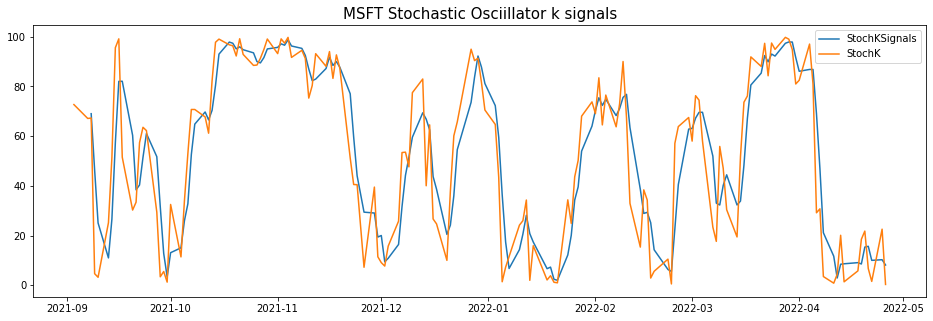

In [32]:
stock_sig = ta.momentum.StochasticOscillator(df['High'],df['Low'],df['Close'],window=14,smooth_window=3).stoch_signal()

plt.figure(figsize=(16,5))
plt.plot(stock_sig, label='StochKSignals')
plt.plot(stoch, label='StochK')

plt.legend(loc=1)
plt.title('{} Stochastic Osciillator k signals'.format(stock), fontsize=15)
plt.show()

### Kaufman's Adaptive Moving Average (KAMA)
--- 
- accounts for market noise and volatility 
- will closely follow prices when the swings are small and noise is low 
- adjusts when price swings widen and follow prices from a greater distance 
- used to ientify overall trend, time turning points, and filter price movement 

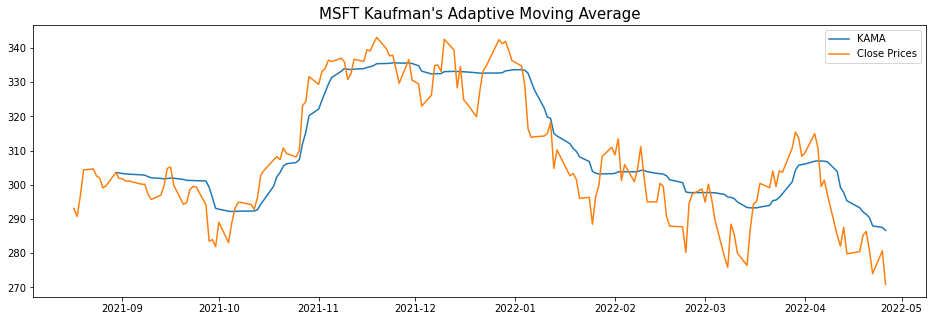

In [42]:
kama = ta.momentum.KAMAIndicator(df['Close'],window=10,pow1=2,pow2=30).kama()

plt.figure(figsize=(16,5))
plt.plot(kama, label='KAMA')
plt.plot(df['Close'],label='Close Prices')

plt.title("{} Kaufman's Adaptive Moving Average".format(stock),fontsize=15)
plt.legend(loc=1)
plt.show()

### Rate of Change (ROC)
---
- Momentum: a pure momentum oscillator that measures the percent change in price from one period to the next 
- Compares the current price with the price `n` period ago 
- forms an oscillator that fluctuates above and below the zero line a the Rate-of-Change moves from positive to negative 
- Signals Include: 
    - Center Line Crossovers: prone to whipsaw (especially short-term) -> help identify overall trend 
    - Divergences: fail to foreshadow reversals more of ten than not 
    - Overbought-Oversold Readings: comes naturally to ROC Oscillator 

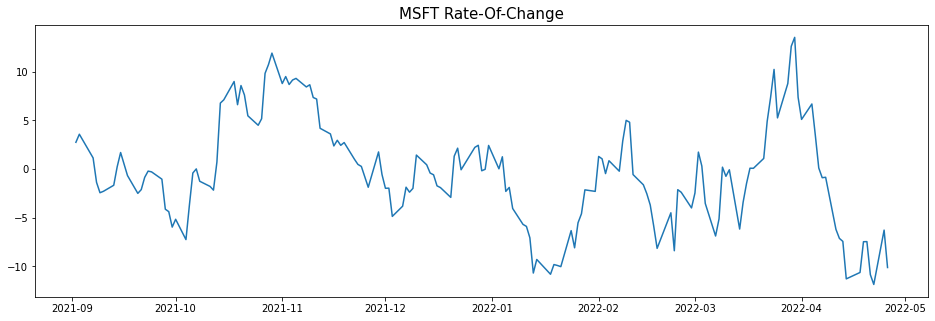

In [47]:
roc = ta.momentum.ROCIndicator(df['Close'],window=12).roc()

plt.figure(figsize=(16,5))
plt.plot(roc)

plt.title('{} Rate-Of-Change'.format(stock),fontsize=15)
plt.show()